<a href="https://colab.research.google.com/github/heriswn/LatihanDTS/blob/master/Final_Project_Balancing_SMOTE_(Size_Mean).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> FINAL PROJECT

## <center>Invalid Syntax(]

# Importing Data

In [0]:
import warnings
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
warnings.filterwarnings("ignore")

In [0]:
data=pd.read_csv('googleplaystore.csv')

In [0]:
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


# Data Preparation

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


## Checking Data

### Check Data Unique

In [0]:
for colum in data.columns:
    print(colum,':\n',data[colum].unique())
    print()

App :
 ['Photo Editor & Candy Camera & Grid & ScrapBook' 'Coloring book moana'
 'U Launcher Lite – FREE Live Cool Themes, Hide Apps' ...
 'Parkinson Exercices FR' 'The SCP Foundation DB fr nn5n'
 'iHoroscope - 2018 Daily Horoscope & Astrology']

Category :
 ['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION' '1.9']

Rating :
 [ 4.1  3.9  4.7  4.5  4.3  4.4  3.8  4.2  4.6  3.2  4.   nan  4.8  4.9
  3.6  3.7  3.3  3.4  3.5  3.1  5.   2.6  3.   1.9  2.5  2.8  2.7  1.
  2.9  2.3  2.2  1.7  2.   1.8  2.4  1.6  2.1  1.4  1.5  1.2 19. ]

Reviews :
 ['159' '967' '87510' ... '603' '1195' '

In [0]:
data.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [0]:
data[data.Category=='1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


### Droping Unclear Data

In [0]:
data=data.drop(10472,axis=0)
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


## Missing Value

### Finding Missing Value

In [0]:
count=0
for i in data.isnull().sum(axis=1):
    if i>0:
        count+=1

if count>0:
    print(count,'Rows have Missing Value')

1480 Rows have Missing Value


In [0]:
for colum in data.columns:
    missed=data[data[colum].isnull()==True].shape[0]
    if missed>0:
        print('Attribute ',colum,': ',missed)
    else:
        print('Attribute ',colum,': No Missing Value')

Attribute  App : No Missing Value
Attribute  Category : No Missing Value
Attribute  Rating :  1474
Attribute  Reviews : No Missing Value
Attribute  Size : No Missing Value
Attribute  Installs : No Missing Value
Attribute  Type :  1
Attribute  Price : No Missing Value
Attribute  Content Rating : No Missing Value
Attribute  Genres : No Missing Value
Attribute  Last Updated : No Missing Value
Attribute  Current Ver :  8
Attribute  Android Ver :  2


### Replace the Missing Value

In [0]:
for colum in data.columns:
    if (data[data[colum].isnull()].shape[0]>0):
        print('\nAttribute-',colum,' (before) :',data[data[colum].isnull()].shape[0])
        if (data[colum].dtypes in ['int64','float64']):
            data[colum].fillna(data[data[colum].notnull()][colum].mean(), inplace=True)
        else:
            data[colum].fillna(data[data[colum].notnull()][colum].mode(), inplace=True)
        print('\nAttribute-',colum,' (after) :',data[data[colum].isnull()].shape[0])


Attribute- Rating  (before) : 1474

Attribute- Rating  (after) : 0

Attribute- Type  (before) : 1

Attribute- Type  (after) : 1

Attribute- Current Ver  (before) : 8

Attribute- Current Ver  (after) : 8

Attribute- Android Ver  (before) : 2

Attribute- Android Ver  (after) : 2


In [0]:
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.100000,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.900000,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.700000,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.500000,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.300000,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.400000,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.800000,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.100000,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.400000,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.700000,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


## Data Type

### Rating

In [0]:
data.Rating.dtype

dtype('float64')

### Reviews

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
App               10840 non-null object
Category          10840 non-null object
Rating            10840 non-null float64
Reviews           10840 non-null object
Size              10840 non-null object
Installs          10840 non-null object
Type              10839 non-null object
Price             10840 non-null object
Content Rating    10840 non-null object
Genres            10840 non-null object
Last Updated      10840 non-null object
Current Ver       10832 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


In [0]:
data.Reviews.dtype

dtype('O')

In [0]:
data.Reviews

0           159
1           967
2         87510
3        215644
4           967
          ...  
10836        38
10837         4
10838         3
10839       114
10840    398307
Name: Reviews, Length: 10840, dtype: object

In [0]:
data.Reviews=data.Reviews.astype('int64')

### Size

In [0]:
data.Size.dtype

dtype('O')

In [0]:
data.Size

0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
                ...        
10836                   53M
10837                  3.6M
10838                  9.5M
10839    Varies with device
10840                   19M
Name: Size, Length: 10840, dtype: object

In [0]:
k_indices=data.Size.loc[data.Size.str.contains('k')].index.tolist()
converter=pd.DataFrame(data.loc[k_indices,'Size'].apply(lambda x: x.strip('k')).astype(float).apply(lambda x: x / 1024).apply(lambda x: round(x, 3)).astype(str))
data.loc[k_indices,'Size'] = converter

In [0]:
data.Size=data.Size.apply(lambda x: x.strip('M'))
data.Size=data.Size.apply(lambda x: x.strip('Varies with device'))
data.Size=data.Size.replace('','NaN')
data.Size=data.Size.astype('float64')
data.Size

0        19.0
1        14.0
2         8.7
3        25.0
4         2.8
         ... 
10836    53.0
10837     3.6
10838     9.5
10839     NaN
10840    19.0
Name: Size, Length: 10840, dtype: float64

In [0]:
data.Size.value_counts()

11.000    198
12.000    196
14.000    194
13.000    191
15.000    184
         ... 
0.932       1
0.556       1
0.628       1
0.539       1
0.660       1
Name: Size, Length: 457, dtype: int64

In [0]:
data['Size'].fillna(data[data['Size'].notnull()]['Size'].mean(), inplace=True)
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.100000,159,19.000000,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.900000,967,14.000000,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.700000,87510,8.700000,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.500000,215644,25.000000,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.300000,967,2.800000,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.400000,167,5.600000,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.800000,178,19.000000,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.100000,36815,29.000000,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.400000,13791,33.000000,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.700000,121,3.100000,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


### Installs

In [0]:
data.Installs.dtype

dtype('O')

In [0]:
data.Installs

0            10,000+
1           500,000+
2         5,000,000+
3        50,000,000+
4           100,000+
            ...     
10836         5,000+
10837           100+
10838         1,000+
10839         1,000+
10840    10,000,000+
Name: Installs, Length: 10840, dtype: object

In [0]:
data.Installs=data.Installs.apply(lambda x: x.strip('+'))
data.Installs=data.Installs.apply(lambda x: x.replace(',',''))
data.Installs=data.Installs.astype('int64')
data.Installs

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10836        5000
10837         100
10838        1000
10839        1000
10840    10000000
Name: Installs, Length: 10840, dtype: int64

### Price

In [0]:
data.Price.dtype

dtype('O')

In [0]:
data.Price

0        0
1        0
2        0
3        0
4        0
        ..
10836    0
10837    0
10838    0
10839    0
10840    0
Name: Price, Length: 10840, dtype: object

In [0]:
data.Price=data.Price.apply(lambda x: x.strip('$'))
data.Price=data.Price.astype('float64')
data.Price

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10836    0.0
10837    0.0
10838    0.0
10839    0.0
10840    0.0
Name: Price, Length: 10840, dtype: float64

In [0]:
data.Installs.value_counts().sort_index()

0               15
1               67
5               82
10             386
50             205
100            719
500            330
1000           907
5000           477
10000         1054
50000          479
100000        1169
500000         539
1000000       1579
5000000        752
10000000      1252
50000000       289
100000000      409
500000000       72
1000000000      58
Name: Installs, dtype: int64

In [0]:
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.100000,159,19.000000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.900000,967,14.000000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.700000,87510,8.700000,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.500000,215644,25.000000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.300000,967,2.800000,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.400000,167,5.600000,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.800000,178,19.000000,50000,Free,0.0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.100000,36815,29.000000,1000000,Free,0.0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.400000,13791,33.000000,1000000,Free,0.0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.700000,121,3.100000,10000,Free,0.0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


### Labeling Popularity Apps

In [0]:
data['Popularity']=data.apply(lambda row:'Very Not Popular' if (row['Installs']<50) 
                                         else('Not Popular' if ((row['Installs']>=50) and (row['Installs']<5000))
                                              else('Ordinary' if ((row['Installs']>=5000) and (row['Installs']<500000))
                                                   else('Popular' if ((row['Installs']>=500000) and (row['Installs']<50000000))
                                                        else 'Very popular'))),axis=1)

In [0]:
data.Popularity.value_counts()

Popular             4122
Ordinary            3179
Not Popular         2161
Very popular         828
Very Not Popular     550
Name: Popularity, dtype: int64

In [0]:
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Popularity
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.100000,159,19.000000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,Ordinary
1,Coloring book moana,ART_AND_DESIGN,3.900000,967,14.000000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,Popular
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.700000,87510,8.700000,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,Popular
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.500000,215644,25.000000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,Very popular
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.300000,967,2.800000,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,Ordinary
5,Paper flowers instructions,ART_AND_DESIGN,4.400000,167,5.600000,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up,Ordinary
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.800000,178,19.000000,50000,Free,0.0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up,Ordinary
7,Infinite Painter,ART_AND_DESIGN,4.100000,36815,29.000000,1000000,Free,0.0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up,Popular
8,Garden Coloring Book,ART_AND_DESIGN,4.400000,13791,33.000000,1000000,Free,0.0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up,Popular
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.700000,121,3.100000,10000,Free,0.0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up,Ordinary


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 14 columns):
App               10840 non-null object
Category          10840 non-null object
Rating            10840 non-null float64
Reviews           10840 non-null int64
Size              10840 non-null float64
Installs          10840 non-null int64
Type              10839 non-null object
Price             10840 non-null float64
Content Rating    10840 non-null object
Genres            10840 non-null object
Last Updated      10840 non-null object
Current Ver       10832 non-null object
Android Ver       10838 non-null object
Popularity        10840 non-null object
dtypes: float64(3), int64(2), object(9)
memory usage: 1.6+ MB


### Dropping Columns Less Effect

In [0]:
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Popularity
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.100000,159,19.000000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,Ordinary
1,Coloring book moana,ART_AND_DESIGN,3.900000,967,14.000000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,Popular
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.700000,87510,8.700000,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,Popular
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.500000,215644,25.000000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,Very popular
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.300000,967,2.800000,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,Ordinary
5,Paper flowers instructions,ART_AND_DESIGN,4.400000,167,5.600000,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up,Ordinary
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.800000,178,19.000000,50000,Free,0.0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up,Ordinary
7,Infinite Painter,ART_AND_DESIGN,4.100000,36815,29.000000,1000000,Free,0.0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up,Popular
8,Garden Coloring Book,ART_AND_DESIGN,4.400000,13791,33.000000,1000000,Free,0.0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up,Popular
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.700000,121,3.100000,10000,Free,0.0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up,Ordinary


In [0]:
data=data.drop(columns=['App','Category'],axis=1)
data=data.drop(columns=['Type','Installs'],axis=1)
data=data.drop(columns=['Last Updated','Current Ver','Android Ver'],axis=1)
data

,Rating,Reviews,Size,Price,Content Rating,Genres,Popularity
0,4.100000,159,19.000000,0.0,Everyone,Art & Design,Ordinary
1,3.900000,967,14.000000,0.0,Everyone,Art & Design;Pretend Play,Popular
2,4.700000,87510,8.700000,0.0,Everyone,Art & Design,Popular
3,4.500000,215644,25.000000,0.0,Teen,Art & Design,Very popular
4,4.300000,967,2.800000,0.0,Everyone,Art & Design;Creativity,Ordinary
5,4.400000,167,5.600000,0.0,Everyone,Art & Design,Ordinary
6,3.800000,178,19.000000,0.0,Everyone,Art & Design,Ordinary
7,4.100000,36815,29.000000,0.0,Everyone,Art & Design,Popular
8,4.400000,13791,33.000000,0.0,Everyone,Art & Design,Popular
9,4.700000,121,3.100000,0.0,Everyone,Art & Design;Creativity,Ordinary


## Encoding

In [0]:
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

### Content Rating

In [0]:
data['Content Rating']=LabelEncoder().fit_transform(data['Content Rating'])
data

,Rating,Reviews,Size,Price,Content Rating,Genres,Popularity
0,4.100000,159,19.000000,0.0,1,Art & Design,Ordinary
1,3.900000,967,14.000000,0.0,1,Art & Design;Pretend Play,Popular
2,4.700000,87510,8.700000,0.0,1,Art & Design,Popular
3,4.500000,215644,25.000000,0.0,4,Art & Design,Very popular
4,4.300000,967,2.800000,0.0,1,Art & Design;Creativity,Ordinary
5,4.400000,167,5.600000,0.0,1,Art & Design,Ordinary
6,3.800000,178,19.000000,0.0,1,Art & Design,Ordinary
7,4.100000,36815,29.000000,0.0,1,Art & Design,Popular
8,4.400000,13791,33.000000,0.0,1,Art & Design,Popular
9,4.700000,121,3.100000,0.0,1,Art & Design;Creativity,Ordinary


### Genres

In [0]:
data['Genres']=LabelEncoder().fit_transform(data['Genres'])
data

,Rating,Reviews,Size,Price,Content Rating,Genres,Popularity
0,4.100000,159,19.000000,0.0,1,9,Ordinary
1,3.900000,967,14.000000,0.0,1,12,Popular
2,4.700000,87510,8.700000,0.0,1,9,Popular
3,4.500000,215644,25.000000,0.0,4,9,Very popular
4,4.300000,967,2.800000,0.0,1,11,Ordinary
5,4.400000,167,5.600000,0.0,1,9,Ordinary
6,3.800000,178,19.000000,0.0,1,9,Ordinary
7,4.100000,36815,29.000000,0.0,1,9,Popular
8,4.400000,13791,33.000000,0.0,1,9,Popular
9,4.700000,121,3.100000,0.0,1,11,Ordinary


### Correlation

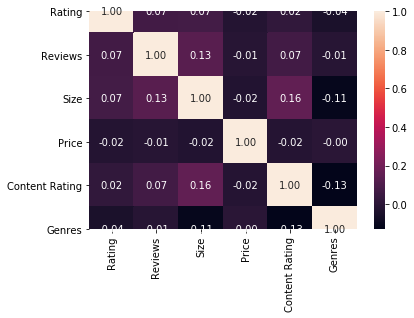

In [0]:
corr=data.corr()
sns.heatmap(corr,annot=True, fmt='.2f')

# Modelling

In [0]:
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [0]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler

### Data Target

In [0]:
X=data.iloc[:,:-1].values
Y=data.iloc[:,-1].values

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=123,stratify=Y)

In [0]:
pd.value_counts(pd.Series(Y))

Popular             4122
Ordinary            3179
Not Popular         2161
Very popular         828
Very Not Popular     550
dtype: int64

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Popularity')]

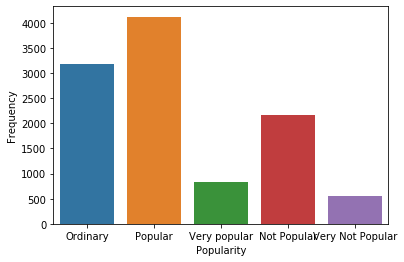

In [0]:
sns.countplot(data.Popularity).set(xlabel='Popularity', ylabel='Frequency')

### Balancing Data

In [0]:
y_train.shape

(8672,)

In [0]:
x_train.shape

(8672, 6)

In [0]:
sm=SMOTE(random_state=123)
x_train_re,y_train_re=sm.fit_resample(x_train,y_train)

In [0]:
pd.value_counts(pd.Series(y_train))

Popular             3298
Ordinary            2543
Not Popular         1729
Very popular         662
Very Not Popular     440
dtype: int64

In [0]:
pd.value_counts(pd.Series(y_train_re))

Not Popular         3298
Popular             3298
Very popular        3298
Ordinary            3298
Very Not Popular    3298
dtype: int64

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Popularity (After Balancing)')]

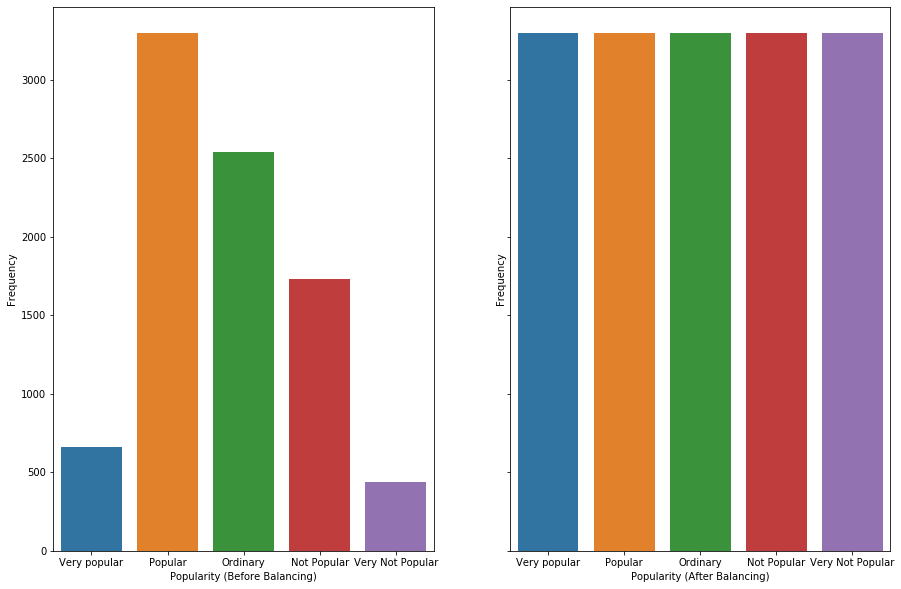

In [0]:
f,axes=plt.subplots(1,2,figsize=(15,10),sharex=True,sharey=True)

sns.countplot(y_train,ax=axes[0]).set(xlabel='Popularity (Before Balancing)', ylabel='Frequency')
sns.countplot(y_train_re,ax=axes[1]).set(xlabel='Popularity (After Balancing)', ylabel='Frequency')

# Experiment

## KNN Models

### Training and Testing Model

#### Find the Best Parameter for KNN Model

In [0]:
paramknn={
    'n_neighbors':[5,6,7,8,9,10],
    'leaf_size':[1,2,3,5],
    'weights':['uniform', 'distance'],
    'algorithm':['auto', 'ball_tree','kd_tree','brute'],
    'n_jobs':[-1]
}

In [0]:
knn_parameters=[]

In [0]:
modelknn=KNeighborsClassifier(n_jobs=-1)

In [0]:
modelknn_best=GridSearchCV(modelknn,param_grid=paramknn,n_jobs=-1)
modelknn_best.fit(x_train,y_train)
knn_parameters.append(modelknn_best.best_params_)
knn_parameters[0]

{'algorithm': 'ball_tree',
 'leaf_size': 1,
 'n_jobs': -1,
 'n_neighbors': 9,
 'weights': 'distance'}

In [0]:
modelknn_re_best=GridSearchCV(modelknn,param_grid=paramknn,n_jobs=-1)
modelknn_re_best.fit(x_train_re,y_train_re)
knn_parameters.append(modelknn_re_best.best_params_)
knn_parameters[1]

{'algorithm': 'auto',
 'leaf_size': 1,
 'n_jobs': -1,
 'n_neighbors': 6,
 'weights': 'distance'}

In [0]:
# def modelknn(parameter,i):
#     modell=KNeighborsClassifier(n_jobs=-1)
#     parameters=parameter[i].values
#     model=GridSearchCV(modell,param_grid=parameters,n_jobs=-1)
#     return model

def modelknn(n,l,w,a,j):
    model=KNeighborsClassifier(n_neighbors=n,leaf_size=l,weights=w,algorithm=a,n_jobs=j)
    return model

In [0]:
model_knn=[]

In [0]:
# model_knn.append(modelknn(knn_parameters,0))

model_knn.append(modelknn(10,2,'distance','auto',-1))

In [0]:
train=model_knn[0].fit(x_train,y_train)
predicted=train.predict(x_test)
print("KNN (Before Balancing) :\n", classification_report(y_test,predicted))
print("\n")
print("Confusion Matrix:\n")
print(confusion_matrix(y_test,predicted))

KNN (Before Balancing) :
                   precision    recall  f1-score   support

     Not Popular       0.73      0.79      0.76       432
        Ordinary       0.80      0.81      0.80       636
         Popular       0.89      0.89      0.89       824
Very Not Popular       0.58      0.40      0.47       110
    Very popular       0.88      0.83      0.85       166

        accuracy                           0.82      2168
       macro avg       0.77      0.74      0.76      2168
    weighted avg       0.81      0.82      0.81      2168



Confusion Matrix:

[[343  58   0  31   0]
 [ 59 514  63   0   0]
 [  0  74 730   1  19]
 [ 66   0   0  44   0]
 [  0   0  29   0 137]]


In [0]:
train_re=model_knn[0].fit(x_train_re,y_train_re)
predicted_re=train_re.predict(x_test)
print("KNN (After Balancing) :\n", classification_report(y_test,predicted_re))
print("\n")
print("Confusion Matrix:\n")
print(confusion_matrix(y_test,predicted_re))

KNN (After Balancing) :
                   precision    recall  f1-score   support

     Not Popular       0.73      0.69      0.71       432
        Ordinary       0.79      0.79      0.79       636
         Popular       0.90      0.83      0.87       824
Very Not Popular       0.47      0.68      0.56       110
    Very popular       0.75      0.89      0.81       166

        accuracy                           0.79      2168
       macro avg       0.73      0.78      0.75      2168
    weighted avg       0.80      0.79      0.79      2168



Confusion Matrix:

[[300  50   0  82   0]
 [ 76 505  54   1   0]
 [  0  86 688   1  49]
 [ 35   0   0  75   0]
 [  0   0  19   0 147]]


In [0]:
model_knn.append(modelknn(7,1,'distance','brute',-1))

In [0]:
train_2=model_knn[1].fit(x_train,y_train)
predicted_2=train_2.predict(x_test)
print("KNN (Before Balancing) :\n", classification_report(y_test,predicted_2))
print("\n")
print("Confusion Matrix:\n")
print(confusion_matrix(y_test,predicted_2))

KNN (Before Balancing) :
                   precision    recall  f1-score   support

     Not Popular       0.73      0.77      0.75       432
        Ordinary       0.80      0.80      0.80       636
         Popular       0.89      0.89      0.89       824
Very Not Popular       0.53      0.42      0.47       110
    Very popular       0.87      0.83      0.85       166

        accuracy                           0.81      2168
       macro avg       0.76      0.74      0.75      2168
    weighted avg       0.81      0.81      0.81      2168



Confusion Matrix:

[[334  58   0  40   0]
 [ 61 509  66   0   0]
 [  0  71 732   1  20]
 [ 63   1   0  46   0]
 [  0   0  29   0 137]]


In [0]:
train_re_2=model_knn[1].fit(x_train_re,y_train_re)
predicted_re_2=train_re_2.predict(x_test)
print("KNN (After Balancing) :\n", classification_report(y_test,predicted_re_2))
print("\n")
print("Confusion Matrix:\n")
print(confusion_matrix(y_test,predicted_re_2))

KNN (After Balancing) :
                   precision    recall  f1-score   support

     Not Popular       0.73      0.69      0.71       432
        Ordinary       0.78      0.79      0.78       636
         Popular       0.90      0.83      0.86       824
Very Not Popular       0.48      0.68      0.56       110
    Very popular       0.75      0.89      0.81       166

        accuracy                           0.79      2168
       macro avg       0.73      0.78      0.75      2168
    weighted avg       0.80      0.79      0.79      2168



Confusion Matrix:

[[297  55   0  80   0]
 [ 76 502  57   1   0]
 [  0  88 685   1  50]
 [ 34   1   0  75   0]
 [  0   0  19   0 147]]


### KFold

In [0]:
def kfoldknnclass(x,y,n):
    for i in range(len(model_knn)):
        kf=KFold(n_splits=n)
        kf.get_n_splits(x)
        model=model_knn[i]
        j=0
        accuracy=[]
        f1_scores=[]
        print('Not balanced')
        print('=================')
        print('Parameter:',knn_parameters[i],'\n')
        print('Hasil dari model KNN:\n')
        for train_index,test_index in kf.split(x):
            X_train,X_test=x[train_index],x[test_index]
            Y_train,Y_test=y[train_index],y[test_index]
                        
            model.fit(X_train,Y_train)
            Y_pred=model.predict(X_test)
            
            accuracy.append(accuracy_score(Y_test,Y_pred))
            f1_scores.append(f1_score(Y_test,Y_pred,average='weighted'))
            print('Subset',j+1,'accuracy= ',accuracy[j])
            print('Subset',j+1,'f1 score=',f1_scores[j])
            j+=1
            
        print('\n')
        print('Average Accuracy= ',np.mean(accuracy))
        print('Average F1 Score= ',np.mean(f1_scores))
        print('\n')
        print('Confusion Matrix:\n',confusion_matrix(Y_test,Y_pred))
        print('\n\n')

In [0]:
kfoldknnclass(X,Y,5)

Not balanced
Parameter: {'algorithm': 'ball_tree', 'leaf_size': 1, 'n_jobs': -1, 'n_neighbors': 9, 'weights': 'distance'} 

Hasil dari model KNN:

Subset 1 accuracy=  0.8560885608856088
Subset 1 f1 score= 0.8579556067951464
Subset 2 accuracy=  0.8500922509225092
Subset 2 f1 score= 0.8451615958963816
Subset 3 accuracy=  0.7726014760147601
Subset 3 f1 score= 0.7725253633954747
Subset 4 accuracy=  0.7850553505535055
Subset 4 f1 score= 0.7806037958932445
Subset 5 accuracy=  0.7882841328413284
Subset 5 f1 score= 0.7822978867112774


Average Accuracy=  0.8104243542435425
Average F1 Score=  0.8077088497383048


Confusion Matrix:
 [[521  73   0  47   0]
 [ 71 620  64   1   1]
 [  0  57 481   0  14]
 [123   0   0  60   0]
 [  0   0   8   0  27]]



Not balanced
Parameter: {'algorithm': 'auto', 'leaf_size': 1, 'n_jobs': -1, 'n_neighbors': 6, 'weights': 'distance'} 

Hasil dari model KNN:

Subset 1 accuracy=  0.8496309963099631
Subset 1 f1 score= 0.8515473398456578
Subset 2 accuracy=  0.847324723

In [0]:
def kfoldknnclass_re(x,y,n):
    for i in range(len(model_knn)):
        kf=KFold(n_splits=n)
        kf.get_n_splits(x)
        model=model_knn[i]
        j=0
        accuracy=[]
        f1_scores=[]
        print('Balanced')
        print('=================')
        print('Parameter:',knn_parameters[i],'\n')
        print('Hasil dari model KNN:\n')
        for train_index,test_index in kf.split(x):
            X_train,X_test=x[train_index],x[test_index]
            Y_train,Y_test=y[train_index],y[test_index]
            
            sm=SMOTE(random_state=123)
            X_train_re,Y_train_re=sm.fit_resample(X_train,Y_train)
            
            model.fit(X_train_re,Y_train_re)
            Y_pred=model.predict(X_test)
            
            accuracy.append(accuracy_score(Y_test,Y_pred))
            f1_scores.append(f1_score(Y_test,Y_pred,average='weighted'))
            print('Subset',j+1,'accuracy= ',accuracy[j])
            print('subset',j+1,'f1 score=',f1_scores[j])
            j+=1
        
        print('\n')
        print('Average Accuracy= ',np.mean(accuracy))
        print('Average F1 Score= ',np.mean(f1_scores))
        print('\n')
        print('Confusion Matrix:\n',confusion_matrix(Y_test,Y_pred))
        print('\n\n')

In [0]:
kfoldknnclass_re(X,Y,5)

Balanced
Parameter: {'algorithm': 'ball_tree', 'leaf_size': 1, 'n_jobs': -1, 'n_neighbors': 9, 'weights': 'distance'} 

Hasil dari model KNN:

Subset 1 accuracy=  0.8353321033210332
subset 1 f1 score= 0.8388450628224597
Subset 2 accuracy=  0.8270295202952029
subset 2 f1 score= 0.8275234577505559
Subset 3 accuracy=  0.7504612546125461
subset 3 f1 score= 0.7560227121300479
Subset 4 accuracy=  0.7518450184501845
subset 4 f1 score= 0.7575434116950021
Subset 5 accuracy=  0.7666051660516605
subset 5 f1 score= 0.7719892118983396


Average Accuracy=  0.7862546125461255
Average F1 Score=  0.7903847712592811


Confusion Matrix:
 [[444  56   0 141   0]
 [ 93 609  50   4   1]
 [  0  76 450   0  26]
 [ 54   0   0 129   0]
 [  0   0   5   0  30]]



Balanced
Parameter: {'algorithm': 'auto', 'leaf_size': 1, 'n_jobs': -1, 'n_neighbors': 6, 'weights': 'distance'} 

Hasil dari model KNN:

Subset 1 accuracy=  0.8284132841328413
subset 1 f1 score= 0.8321492465454154
Subset 2 accuracy=  0.8261070110701108


## Decision Tree Models

### Training and Testing Model

#### Find the Best Parameter for Decision Tree Model

In [0]:
paramdtree={
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
    'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11],
    'random_state':[123]
}

In [0]:
dtree_parameters=[]

In [0]:
modeldtree=DecisionTreeClassifier(random_state=1234)

In [0]:
modeldtree_best=GridSearchCV(modeldtree,param_grid=paramdtree,n_jobs=-1)
modeldtree_best.fit(x_train,y_train)
dtree_parameters.append(modeldtree_best.best_params_)
dtree_parameters[0]

{'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 12,
 'random_state': 123}

In [0]:
modeldtree_re_best=GridSearchCV(modeldtree,param_grid=paramdtree,n_jobs=-1)
modeldtree_re_best.fit(x_train_re,y_train_re)
dtree_parameters.append(modeldtree_re_best.best_params_)
dtree_parameters[1]

{'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 9,
 'random_state': 123}

In [0]:
# def modelknn(parameter,i):
#     model=KNeighborsClassifier(n_jobs=-1)
#     model=GridSearchCV(model,param_grid=parameters[i],n_jobs=-1)
#     return model

def modeldtree(f,s,l,r):
    model=DecisionTreeClassifier(max_features=f,min_samples_split=s,min_samples_leaf=l,random_state=r)
    return model

In [0]:
model_dtree=[]

In [0]:
model_dtree.append(modeldtree('auto',2,5,123))

In [0]:
train=model_dtree[0].fit(x_train,y_train)
predicted=train.predict(x_test)
print("Decision Tree (Before Balancing) :\n", classification_report(y_test,predicted))
print("\n")
print("Confusion Matrix:\n")
print(confusion_matrix(y_test,predicted))

Decision Tree (Before Balancing) :
                   precision    recall  f1-score   support

     Not Popular       0.70      0.75      0.73       432
        Ordinary       0.80      0.80      0.80       636
         Popular       0.90      0.90      0.90       824
Very Not Popular       0.59      0.54      0.56       110
    Very popular       0.86      0.78      0.82       166

        accuracy                           0.81      2168
       macro avg       0.77      0.75      0.76      2168
    weighted avg       0.81      0.81      0.81      2168



Confusion Matrix:

[[324  67   1  40   0]
 [ 81 509  45   1   0]
 [  5  60 738   0  21]
 [ 51   0   0  59   0]
 [  0   0  36   0 130]]


In [0]:
train_re=model_dtree[0].fit(x_train_re,y_train_re)
predicted_re=train_re.predict(x_test)
print("Decision Tree (After Balancing) :\n", classification_report(y_test,predicted_re))
print("\n")
print("Confusion Matrix:\n")
print(confusion_matrix(y_test,predicted_re))

Decision Tree (After Balancing) :
                   precision    recall  f1-score   support

     Not Popular       0.75      0.74      0.74       432
        Ordinary       0.79      0.77      0.78       636
         Popular       0.89      0.85      0.87       824
Very Not Popular       0.55      0.71      0.62       110
    Very popular       0.77      0.92      0.84       166

        accuracy                           0.80      2168
       macro avg       0.75      0.80      0.77      2168
    weighted avg       0.81      0.80      0.80      2168



Confusion Matrix:

[[318  50   3  61   0]
 [ 73 491  67   2   3]
 [  2  80 699   1  42]
 [ 32   0   0  78   0]
 [  0   0  14   0 152]]


In [0]:
model_dtree.append(modeldtree('auto',10,1,123))

In [0]:
train_2=model_dtree[1].fit(x_train,y_train)
predicted_2=train_2.predict(x_test)
print("Decision Tree (Before Balancing) :\n", classification_report(y_test,predicted_2))
print("\n")
print("Confusion Matrix:\n")
print(confusion_matrix(y_test,predicted_2))

Decision Tree (Before Balancing) :
                   precision    recall  f1-score   support

     Not Popular       0.73      0.79      0.76       432
        Ordinary       0.80      0.82      0.81       636
         Popular       0.92      0.90      0.91       824
Very Not Popular       0.60      0.52      0.56       110
    Very popular       0.93      0.84      0.88       166

        accuracy                           0.83      2168
       macro avg       0.80      0.77      0.78      2168
    weighted avg       0.83      0.83      0.83      2168



Confusion Matrix:

[[342  52   0  38   0]
 [ 74 521  41   0   0]
 [  1  74 738   0  11]
 [ 51   2   0  57   0]
 [  0   0  27   0 139]]


In [0]:
train_re_2=model_dtree[1].fit(x_train_re,y_train_re)
predicted_re_2=train_re_2.predict(x_test)
print("Decision Tree (After Balancing) :\n", classification_report(y_test,predicted_re_2))
print("\n")
print("Confusion Matrix:\n")
print(confusion_matrix(y_test,predicted_re_2))

Decision Tree (After Balancing) :
                   precision    recall  f1-score   support

     Not Popular       0.74      0.75      0.75       432
        Ordinary       0.79      0.79      0.79       636
         Popular       0.89      0.85      0.87       824
Very Not Popular       0.48      0.63      0.54       110
    Very popular       0.84      0.83      0.83       166

        accuracy                           0.80      2168
       macro avg       0.75      0.77      0.76      2168
    weighted avg       0.81      0.80      0.80      2168



Confusion Matrix:

[[323  35   0  74   0]
 [ 72 504  56   1   3]
 [  0  96 703   1  24]
 [ 40   1   0  69   0]
 [  0   0  29   0 137]]


### KFold

In [0]:
def kfolddtreeclass(x,y,n):
    for i in range(len(model_dtree)):
        kf=KFold(n_splits=n)
        kf.get_n_splits(x)
        model=model_dtree[i]
        j=0
        accuracy=[]
        f1_scores=[]
        print('Not Balanced')
        print('=================')
        print('Parameter:',dtree_parameters[i],'\n')
        print('Hasil dari model Decision Tree:\n')
        for train_index,test_index in kf.split(x):
            X_train,X_test=x[train_index],x[test_index]
            Y_train,Y_test=y[train_index],y[test_index]
                        
            model.fit(X_train,Y_train)
            Y_pred=model.predict(X_test)
            
            accuracy.append(accuracy_score(Y_test,Y_pred))
            f1_scores.append(f1_score(Y_test,Y_pred,average='weighted'))
            print('Subset',j+1,'accuracy= ',accuracy[j])
            print('Subset',j+1,'f1 score=',f1_scores[j])
            j+=1
            
        print('\n')
        print('Average Accuracy= ',np.mean(accuracy))
        print('Average F1 Score= ',np.mean(f1_scores))
        print('\n')
        print('Confusion Matrix:\n',confusion_matrix(Y_test,Y_pred))
        print('\n\n')

In [0]:
kfolddtreeclass(X,Y,5)

Not Balanced
Parameter: {'max_features': 'auto', 'min_samples_leaf': 5, 'min_samples_split': 12, 'random_state': 123} 

Hasil dari model Decision Tree:

Subset 1 accuracy=  0.8071955719557196
Subset 1 f1 score= 0.8164908952034771
Subset 2 accuracy=  0.8168819188191881
Subset 2 f1 score= 0.8160345573652388
Subset 3 accuracy=  0.7924354243542435
Subset 3 f1 score= 0.7928947031943423
Subset 4 accuracy=  0.757380073800738
Subset 4 f1 score= 0.7530057631875333
Subset 5 accuracy=  0.7799815498154982
Subset 5 f1 score= 0.7749495975857862


Average Accuracy=  0.7907749077490774
Average F1 Score=  0.7906751033072756


Confusion Matrix:
 [[508  94   7  32   0]
 [ 73 614  68   2   0]
 [  1  58 476   0  17]
 [111   1   0  71   0]
 [  0   0  13   0  22]]



Not Balanced
Parameter: {'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 9, 'random_state': 123} 

Hasil dari model Decision Tree:

Subset 1 accuracy=  0.8505535055350554
Subset 1 f1 score= 0.8536485344864229
Subset 2 accurac

In [0]:
def kfolddtreeclass_re(x,y,n):
    for i in range(len(model_dtree)):
        kf=KFold(n_splits=n)
        kf.get_n_splits(x)
        model=model_dtree[i]
        j=0
        accuracy=[]
        f1_scores=[]
        print('Balanced')
        print('=================')
        print('Parameter:',dtree_parameters[i],'\n')
        print('Hasil dari model Decision Tree:\n')
        for train_index,test_index in kf.split(x):
            X_train,X_test=x[train_index],x[test_index]
            Y_train,Y_test=y[train_index],y[test_index]
            
            sm=SMOTE(random_state=123)
            X_train_re,Y_train_re=sm.fit_resample(X_train,Y_train)
            
            model.fit(X_train_re,Y_train_re)
            Y_pred=model.predict(X_test)
            
            accuracy.append(accuracy_score(Y_test,Y_pred))
            f1_scores.append(f1_score(Y_test,Y_pred,average='weighted'))
            print('Subset',j+1,'accuracy= ',accuracy[j])
            print('subset',j+1,'f1 score=',f1_scores[j])
            j+=1
        
        print('\n')
        print('Average Accuracy= ',np.mean(accuracy))
        print('Average F1 Score= ',np.mean(f1_scores))
        print('\n')
        print('Confusion Matrix:\n',confusion_matrix(Y_test,Y_pred))
        print('\n\n')

In [0]:
kfolddtreeclass_re(X,Y,5)

Balanced
Parameter: {'max_features': 'auto', 'min_samples_leaf': 5, 'min_samples_split': 12, 'random_state': 123} 

Hasil dari model Decision Tree:

Subset 1 accuracy=  0.8413284132841329
subset 1 f1 score= 0.8455144658915433
Subset 2 accuracy=  0.7988929889298892
subset 2 f1 score= 0.8027967012147729
Subset 3 accuracy=  0.7781365313653137
subset 3 f1 score= 0.7819042479352376
Subset 4 accuracy=  0.7495387453874539
subset 4 f1 score= 0.7538568993187929
Subset 5 accuracy=  0.7638376383763837
subset 5 f1 score= 0.7704259288653551


Average Accuracy=  0.7863468634686347
Average F1 Score=  0.7908996486451403


Confusion Matrix:
 [[454  64   4 115   4]
 [ 84 615  47   4   7]
 [  2  68 437   0  45]
 [ 61   0   0 122   0]
 [  0   0   7   0  28]]



Balanced
Parameter: {'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 9, 'random_state': 123} 

Hasil dari model Decision Tree:

Subset 1 accuracy=  0.8279520295202952
subset 1 f1 score= 0.8334603754843949
Subset 2 accuracy=  0.8

## Random Forest Models

### Training and Testing Model

#### Find the Best Parameter for Random Forest Model

In [0]:
paramrf={
    'criterion':['gini','entropy'],
    'n_estimators':[10,15,20,25,30],
    'min_samples_leaf':[1,2,3],
    'min_samples_split':[3,4,5,6,7], 
    'random_state':[123],
    'n_jobs':[-1]
}

In [0]:
rf_parameters=[]

In [0]:
modelrf=RandomForestClassifier()

In [0]:
modelrf_best=GridSearchCV(modelrf,param_grid=paramrf,n_jobs=-1)
modelrf_best.fit(x_train,y_train)
rf_parameters.append(modelrf_best.best_params_)
rf_parameters[0]

{'criterion': 'gini',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 20,
 'n_jobs': -1,
 'random_state': 123}

In [0]:
modelrf_re_best=GridSearchCV(modelrf,param_grid=paramrf,n_jobs=-1)
modelrf_re_best.fit(x_train_re,y_train_re)
rf_parameters.append(modelrf_re_best.best_params_)
rf_parameters[1]

{'criterion': 'entropy',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 30,
 'n_jobs': -1,
 'random_state': 123}

In [0]:
# def modelknn(parameter,i):
#     modell=KNeighborsClassifier(n_jobs=-1)
#     parameters=parameter[i].values
#     model=GridSearchCV(modell,param_grid=parameters,n_jobs=-1)
#     return model

def modelrf(c,e,l,s,r,j):
    model=RandomForestClassifier(criterion=c,n_estimators=e,min_samples_leaf=l,
                                 min_samples_split=s,random_state=r,n_jobs=j)
    return model

In [0]:
model_rf=[]

In [0]:
# model_knn.append(modelknn(knn_parameters,0))

model_rf.append(modelrf('entropy',20,1,4,123,-1))

In [0]:
train=model_rf[0].fit(x_train,y_train)
predicted=train.predict(x_test)
print("Random Forest (Before Balancing) :\n", classification_report(y_test,predicted))
print("\n")
print("Confusion Matrix:\n")
print(confusion_matrix(y_test,predicted))

Random Forest (Before Balancing) :
                   precision    recall  f1-score   support

     Not Popular       0.76      0.82      0.79       432
        Ordinary       0.84      0.85      0.85       636
         Popular       0.93      0.91      0.92       824
Very Not Popular       0.59      0.49      0.54       110
    Very popular       0.94      0.91      0.93       166

        accuracy                           0.86      2168
       macro avg       0.81      0.80      0.80      2168
    weighted avg       0.86      0.86      0.85      2168



Confusion Matrix:

[[356  40   0  36   0]
 [ 54 540  42   0   0]
 [  0  61 753   1   9]
 [ 56   0   0  54   0]
 [  0   0  15   0 151]]


In [0]:
train_re=model_rf[0].fit(x_train_re,y_train_re)
predicted_re=train_re.predict(x_test)
print("Random Forest (After Balancing) :\n", classification_report(y_test,predicted_re))
print("\n")
print("Confusion Matrix:\n")
print(confusion_matrix(y_test,predicted_re))

Random Forest (After Balancing) :
                   precision    recall  f1-score   support

     Not Popular       0.76      0.80      0.78       432
        Ordinary       0.85      0.85      0.85       636
         Popular       0.94      0.91      0.93       824
Very Not Popular       0.53      0.56      0.55       110
    Very popular       0.90      0.93      0.91       166

        accuracy                           0.85      2168
       macro avg       0.80      0.81      0.80      2168
    weighted avg       0.86      0.85      0.86      2168



Confusion Matrix:

[[344  35   0  53   0]
 [ 59 542  34   1   0]
 [  0  57 749   1  17]
 [ 48   0   0  62   0]
 [  0   0  12   0 154]]


In [0]:
model_rf.append(modelrf('gini',30,1,4,123,-1))

In [0]:
train_2=model_rf[1].fit(x_train,y_train)
predicted_2=train_2.predict(x_test)
print("Random Forest (Before Balancing) :\n", classification_report(y_test,predicted_2))
print("\n")
print("Confusion Matrix:\n")
print(confusion_matrix(y_test,predicted_2))

Random Forest (Before Balancing) :
                   precision    recall  f1-score   support

     Not Popular       0.77      0.83      0.80       432
        Ordinary       0.84      0.85      0.85       636
         Popular       0.93      0.92      0.92       824
Very Not Popular       0.63      0.54      0.58       110
    Very popular       0.95      0.92      0.93       166

        accuracy                           0.86      2168
       macro avg       0.83      0.81      0.82      2168
    weighted avg       0.86      0.86      0.86      2168



Confusion Matrix:

[[357  42   0  33   0]
 [ 55 541  40   0   0]
 [  0  60 755   1   8]
 [ 51   0   0  59   0]
 [  0   0  14   0 152]]


In [0]:
train_re_2=model_rf[1].fit(x_train_re,y_train_re)
predicted_re_2=train_re_2.predict(x_test)
print("Random Forest (After Balancing) :\n", classification_report(y_test,predicted_re_2))
print("\n")
print("Confusion Matrix:\n")
print(confusion_matrix(y_test,predicted_re_2))

Random Forest (After Balancing) :
                   precision    recall  f1-score   support

     Not Popular       0.76      0.80      0.78       432
        Ordinary       0.84      0.85      0.85       636
         Popular       0.94      0.90      0.92       824
Very Not Popular       0.53      0.56      0.54       110
    Very popular       0.92      0.94      0.93       166

        accuracy                           0.85      2168
       macro avg       0.80      0.81      0.80      2168
    weighted avg       0.85      0.85      0.85      2168



Confusion Matrix:

[[344  34   0  54   0]
 [ 59 540  36   1   0]
 [  0  67 743   1  13]
 [ 48   0   0  62   0]
 [  0   0  10   0 156]]


### KFold

In [0]:
def kfoldrfclass(x,y,n):
    for i in range(len(model_rf)):
        kf=KFold(n_splits=n)
        kf.get_n_splits(x)
        model=model_rf[i]
        j=0
        accuracy=[]
        f1_scores=[]
        print('Not balanced')
        print('=================')
        print('Parameter:',rf_parameters[i],'\n')
        print('Hasil dari model Random Forest:\n')
        for train_index,test_index in kf.split(x):
            X_train,X_test=x[train_index],x[test_index]
            Y_train,Y_test=y[train_index],y[test_index]
                        
            model.fit(X_train,Y_train)
            Y_pred=model.predict(X_test)
            
            accuracy.append(accuracy_score(Y_test,Y_pred))
            f1_scores.append(f1_score(Y_test,Y_pred,average='weighted'))
            print('Subset',j+1,'accuracy= ',accuracy[j])
            print('Subset',j+1,'f1 score=',f1_scores[j])
            j+=1
            
        print('\n')
        print('Average Accuracy= ',np.mean(accuracy))
        print('Average F1 Score= ',np.mean(f1_scores))
        print('\n')
        print('Confusion Matrix:\n',confusion_matrix(Y_test,Y_pred))
        print('\n\n')

In [0]:
kfoldrfclass(X,Y,5)

Not balanced
Parameter: {'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 20, 'n_jobs': -1, 'random_state': 123} 

Hasil dari model Random Forest:

Subset 1 accuracy=  0.8888376383763837
Subset 1 f1 score= 0.8905838251074595
Subset 2 accuracy=  0.8736162361623616
Subset 2 f1 score= 0.8715319076173491
Subset 3 accuracy=  0.8288745387453874
Subset 3 f1 score= 0.8294254662072095
Subset 4 accuracy=  0.8297970479704797
Subset 4 f1 score= 0.8291901072584392
Subset 5 accuracy=  0.8270295202952029
Subset 5 f1 score= 0.8230891061479089


Average Accuracy=  0.8496309963099631
Average F1 Score=  0.8487640824676731


Confusion Matrix:
 [[543  61   0  37   0]
 [ 64 645  45   3   0]
 [  0  39 501   0  12]
 [103   0   0  80   0]
 [  0   0  11   0  24]]



Not balanced
Parameter: {'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 30, 'n_jobs': -1, 'random_state': 123} 

Hasil dari model Random Forest:

Subset 1 accuracy=  0.888837

In [0]:
def kfoldrfclass_re(x,y,n):
    for i in range(len(model_rf)):
        kf=KFold(n_splits=n)
        kf.get_n_splits(x)
        model=model_rf[i]
        j=0
        accuracy=[]
        f1_scores=[]
        print('Balanced')
        print('=================')
        print('Parameter:',rf_parameters[i],'\n')
        print('Hasil dari model Random Forest:\n')
        for train_index,test_index in kf.split(x):
            X_train,X_test=x[train_index],x[test_index]
            Y_train,Y_test=y[train_index],y[test_index]
            
            sm=SMOTE(random_state=123)
            X_train_re,Y_train_re=sm.fit_resample(X_train,Y_train)
            
            model.fit(X_train_re,Y_train_re)
            Y_pred=model.predict(X_test)
            
            accuracy.append(accuracy_score(Y_test,Y_pred))
            f1_scores.append(f1_score(Y_test,Y_pred,average='weighted'))
            print('Subset',j+1,'accuracy= ',accuracy[j])
            print('subset',j+1,'f1 score=',f1_scores[j])
            j+=1
        
        print('\n')
        print('Average Accuracy= ',np.mean(accuracy))
        print('Average F1 Score= ',np.mean(f1_scores))
        print('\n')
        print('Confusion Matrix:\n',confusion_matrix(Y_test,Y_pred))
        print('\n\n')

In [0]:
kfoldrfclass_re(X,Y,5)

Balanced
Parameter: {'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 20, 'n_jobs': -1, 'random_state': 123} 

Hasil dari model Random Forest:

Subset 1 accuracy=  0.882380073800738
subset 1 f1 score= 0.8847208099841357
Subset 2 accuracy=  0.863929889298893
subset 2 f1 score= 0.8659794882335183
Subset 3 accuracy=  0.8224169741697417
subset 3 f1 score= 0.8261825840048977
Subset 4 accuracy=  0.8247232472324724
subset 4 f1 score= 0.8260678439940592
Subset 5 accuracy=  0.8316420664206642
subset 5 f1 score= 0.8321492787242294


Average Accuracy=  0.845018450184502
Average F1 Score=  0.8470200009881681


Confusion Matrix:
 [[520  56   0  65   0]
 [ 63 653  38   3   0]
 [  0  49 487   0  16]
 [ 71   0   0 112   0]
 [  0   0   4   0  31]]



Balanced
Parameter: {'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 30, 'n_jobs': -1, 'random_state': 123} 

Hasil dari model Random Forest:

Subset 1 accuracy=  0.8796125461254612


## Naive Bayes

### Training dan Testing

#### Find the Best Parameter for Naive Bayes Model

In [0]:
paramnaive={
    'priors':[None],
    'var_smoothing':[1e-09,1e-05,2e-09,3e-09,5e-09]
}

In [0]:
naive_parameters=[]

In [0]:
modelnaive=GaussianNB()

In [0]:
modelnaive_best=GridSearchCV(modelnaive,param_grid=paramnaive,n_jobs=-1)
modelnaive_best.fit(x_train,y_train)
naive_parameters.append(modelnaive_best.best_params_)
naive_parameters[0]

{'priors': None, 'var_smoothing': 1e-09}

In [0]:
modelnaive_re_best=GridSearchCV(modelnaive,param_grid=paramnaive,n_jobs=-1)
modelnaive_re_best.fit(x_train_re,y_train_re)
naive_parameters.append(modelnaive_re_best.best_params_)
naive_parameters[1]

{'priors': None, 'var_smoothing': 1e-09}

In [0]:
def modelnaivebayes(prior,var_smooth):
    model=GaussianNB(priors=prior,var_smoothing=var_smooth)
    return model

In [0]:
model_naive=[]

In [0]:
model_naive.append(modelnaivebayes(None,1e-09))

In [0]:
train=model_naive[0].fit(x_train,y_train)
predicted=train.predict(x_test)
print("Naive Bayes (Before Balancing) :\n", classification_report(y_test,predicted))
print("\n")
print("Confusion Matrix:\n")
print(confusion_matrix(y_test,predicted))

Naive Bayes (Before Balancing) :
                   precision    recall  f1-score   support

     Not Popular       0.51      1.00      0.68       432
        Ordinary       0.65      0.52      0.58       636
         Popular       0.92      0.77      0.84       824
Very Not Popular       0.00      0.00      0.00       110
    Very popular       0.92      0.74      0.82       166

        accuracy                           0.70      2168
       macro avg       0.60      0.60      0.58      2168
    weighted avg       0.71      0.70      0.68      2168



Confusion Matrix:

[[431   1   0   0   0]
 [294 329  13   0   0]
 [  2 178 633   0  11]
 [110   0   0   0   0]
 [  0   0  43   0 123]]


In [0]:
train_re=model_naive[0].fit(x_train_re,y_train_re)
predicted_re=train_re.predict(x_test)
print("Naive Bayes (After Balancing) :\n", classification_report(y_test,predicted_re))
print("\n")
print("Confusion Matrix:\n")
print(confusion_matrix(y_test,predicted_re))

Naive Bayes (After Balancing) :
                   precision    recall  f1-score   support

     Not Popular       0.11      0.06      0.08       432
        Ordinary       0.62      0.45      0.52       636
         Popular       0.93      0.76      0.83       824
Very Not Popular       0.18      1.00      0.30       110
    Very popular       0.89      0.80      0.84       166

        accuracy                           0.55      2168
       macro avg       0.54      0.61      0.52      2168
    weighted avg       0.63      0.55      0.57      2168



Confusion Matrix:

[[ 28   0   0 404   0]
 [226 289  13 108   0]
 [  4 178 624   1  17]
 [  0   0   0 110   0]
 [  0   0  34   0 132]]


### KFold

In [0]:
def kfoldnaiveclass(x,y,n):
    for i in range(len(model_naive)):
        kf=KFold(n_splits=n)
        kf.get_n_splits(x)
        model=model_naive[i]
        j=0
        accuracy=[]
        f1_scores=[]
        print('Not Balanced')
        print('=================')
        print('Parameter:',naive_parameters[i],'\n')
        print('Hasil dari model Naive Bayes:\n')
        for train_index,test_index in kf.split(x):
            X_train,X_test=x[train_index],x[test_index]
            Y_train,Y_test=y[train_index],y[test_index]
                        
            model.fit(X_train,Y_train)
            Y_pred=model.predict(X_test)
            
            accuracy.append(accuracy_score(Y_test,Y_pred))
            f1_scores.append(f1_score(Y_test,Y_pred,average='weighted'))
            print('Subset',j+1,'accuracy= ',accuracy[j])
            print('Subset',j+1,'f1 score=',f1_scores[j])
            j+=1
            
        print('\n')
        print('Average Accuracy= ',np.mean(accuracy))
        print('Average F1 Score= ',np.mean(f1_scores))
        print('\n')
        print('Confusion Matrix:\n',confusion_matrix(Y_test,Y_pred))
        print('\n\n')

In [0]:
kfoldnaiveclass(X,Y,5)

Not Balanced
Parameter: {'priors': None, 'var_smoothing': 1e-09} 

Hasil dari model Naive Bayes:

Subset 1 accuracy=  0.7587638376383764
Subset 1 f1 score= 0.7746115201722084
Subset 2 accuracy=  0.757380073800738
Subset 2 f1 score= 0.7616936499093858
Subset 3 accuracy=  0.6831180811808119
Subset 3 f1 score= 0.6640929717568642
Subset 4 accuracy=  0.676660516605166
Subset 4 f1 score= 0.6374980454190506
Subset 5 accuracy=  0.6554428044280443
Subset 5 f1 score= 0.6232747216024065


Average Accuracy=  0.7062730627306273
Average F1 Score=  0.692234181771983


Confusion Matrix:
 [[641   0   0   0   0]
 [383 366   8   0   0]
 [  0 149 393   0  10]
 [183   0   0   0   0]
 [  0   0  14   0  21]]





In [0]:
def kfoldnaiveclass_re(x,y,n):
    for i in range(len(model_naive)):
        kf=KFold(n_splits=n)
        kf.get_n_splits(x)
        model=model_naive[i]
        j=0
        accuracy=[]
        f1_scores=[]
        print('Balanced')
        print('=================')
        print('Parameter:',naive_parameters[i],'\n')
        print('Hasil dari model Naive Bayes:\n')
        for train_index,test_index in kf.split(x):
            X_train,X_test=x[train_index],x[test_index]
            Y_train,Y_test=y[train_index],y[test_index]
            
            sm=SMOTE(random_state=123)
            X_train_re,Y_train_re=sm.fit_resample(X_train,Y_train)
            
            model.fit(X_train_re,Y_train_re)
            Y_pred=model.predict(X_test)
            
            accuracy.append(accuracy_score(Y_test,Y_pred))
            f1_scores.append(f1_score(Y_test,Y_pred,average='weighted'))
            print('Subset',j+1,'accuracy= ',accuracy[j])
            print('subset',j+1,'f1 score=',f1_scores[j])
            j+=1
        
        print('\n')
        print('Average Accuracy= ',np.mean(accuracy))
        print('Average F1 Score= ',np.mean(f1_scores))
        print('\n')
        print('Confusion Matrix:\n',confusion_matrix(Y_test,Y_pred))
        print('\n\n')

In [0]:
kfoldnaiveclass_re(X,Y,5)

Balanced
Parameter: {'priors': None, 'var_smoothing': 1e-09} 

Hasil dari model Naive Bayes:

Subset 1 accuracy=  0.7149446494464945
subset 1 f1 score= 0.7481449070066826
Subset 2 accuracy=  0.7121771217712177
subset 2 f1 score= 0.7350654534636171
Subset 3 accuracy=  0.5055350553505535
subset 3 f1 score= 0.5332396863343197
Subset 4 accuracy=  0.41559040590405905
subset 4 f1 score= 0.42046255766377116
Subset 5 accuracy=  0.42988929889298894
subset 5 f1 score= 0.43715956297461084


Average Accuracy=  0.5556273062730627
Average F1 Score=  0.5748144334886003


Confusion Matrix:
 [[ 20   0   0 621   0]
 [275 316   8 158   0]
 [  0 149 389   0  14]
 [  0   0   0 183   0]
 [  0   0  11   0  24]]



